In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 5.18376745, -1.17780132],
       [-1.76719521,  9.9630724 ],
       [ 5.80742825, -2.00547928],
       ...,
       [ 5.29200859, -1.09440051],
       [-3.32138258,  6.46731641],
       [-6.56952383,  4.31005318]])

In [4]:
y

array([0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1,

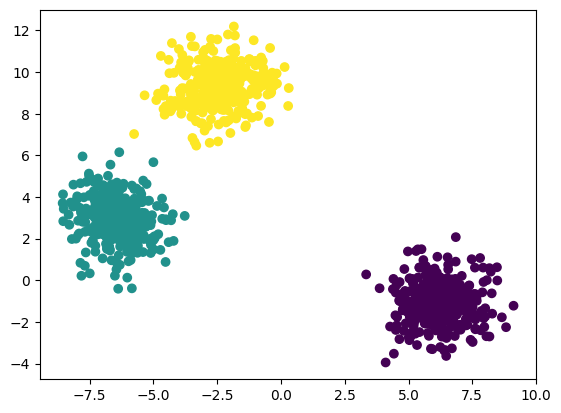

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
# Standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)

In [13]:
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
## Elbow method to select K value 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesud

In [16]:
wcss

[1340.0000000000002,
 350.8593394839402,
 58.61205342838508,
 50.04828114998031,
 42.749752554545964,
 35.57037158397942,
 31.385958589137324,
 28.18327045656971,
 25.34291882568387,
 23.548749002553308]

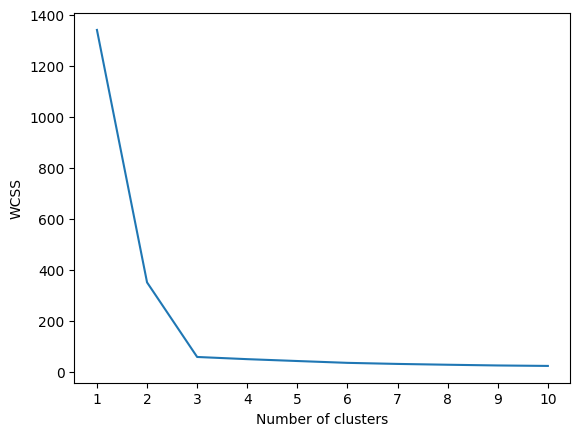

In [17]:
## plot elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train_scaled)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1,
       1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1,
       2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0,

In [20]:
y_pred=kmeans.predict(X_test_scaled)

In [21]:
y_pred

array([0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0,
       0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2,
       0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1,

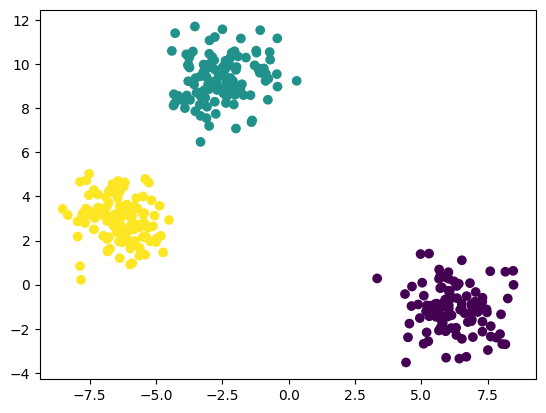

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [23]:
## Validating the k value 
## KneeLocator 
## Silhoutee scoring 

In [24]:
##kneelocator
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [25]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [27]:
kl.elbow

3

In [28]:
## silhoutte score 
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficiets=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficiets.append(score)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shindesud

In [30]:
silhouette_coefficiets

[0.7049190939515857,
 0.7988955735566206,
 0.6561506984000771,
 0.5243702370926537,
 0.3476823918913005,
 0.34277754945856603,
 0.35224906699160846,
 0.34297426797599295,
 0.347442238916128]

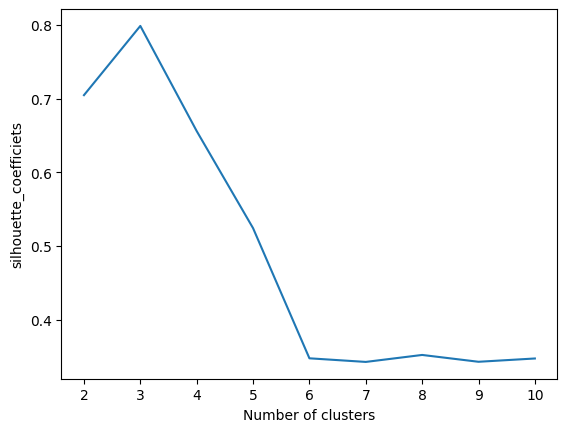

In [31]:
## plotting silhouette score 
plt.plot(range(2,11),silhouette_coefficiets)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficiets')
plt.show()